# Customer Churn Prediction in Telecom Industry

Created by: Marcus Vinicius da Silva Fernandes.

Dataset: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/data

References:
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9128990/
- https://www.kaggle.com/code/mnassrib/customer-churn-prediction-telecom-churn-dataset

## Objective

## Importing the libraries

In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data overview
- The file 'churn-bigml-80.csv' will be used for training the models.
- The file 'churn-bigml-20.csv' will be used for testing the models.

In [2]:
# Loading the data
cwd = os.getcwd()
churn_train = pd.read_csv(cwd + '/Data/churn-bigml-80.csv')
churn_test = pd.read_csv(cwd + '/Data/churn-bigml-20.csv')

### View the first 5 rows of the datasets

In [3]:
churn_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
churn_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### Understand the features

In [5]:
print(churn_train.columns.tolist())

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


| Feature                | Description                                                   |
|------------------------|---------------------------------------------------------------|
| State                  | The US state where the phone plan is hired.                   |
| Account length         | The number of months the customer has stayed with the company.|
| Area code              | A set of digits that identifies a particular telephone service area within a state. |
| International plan     | Identifies if the particular customer makes calls outside the US. |
| Voice mail plan        | Identifies if the particular customer uses the voice messages service. |
| Number vmail messages  | Number of voice mail messages.                                |
| Total day minutes      | Total daily call minutes for the particular customer.         |
| Total day calls        | Total daily calls for the particular customer.                |
| Total day charge       | Total daily charged fees for the particular customer.         |
| Total eve minutes      | Total call minutes made in the evening.                       |
| Total eve calls        | Total number of calls made in the evening.                    |
| Total eve charge       | Total charged fees for calls made in the evening.             |
| Total night minutes    | Total call minutes made in the night.                         |
| Total night calls      | Total number of calls made in the night.                      |
| Total night charge     | Total charged fees for calls made in the night.               |
| Total intl minutes     | Total international call minutes made.                        |
| Total intl calls       | Total number of international calls.                          |
| Total intl charge      | Total charged fees for international calls.                   |
| Customer service calls | Total number of customer service calls.                       |
| Churn                  | If the client churned or not.                                 |


In [6]:
if not churn_train.columns.tolist() == churn_test.columns.tolist():
    print('The tables are not equal in terms of number and order of features.')
else:
    print('The tables are equal in terms of number and order of features.')

The tables are equal in terms of number and order of features.


### Understand the shape of the dataset.

In [7]:
print('Train dataset')
print('Number of rows: ', churn_train.shape[0])
print('Number of features (columns): ', churn_train.shape[1])

print('\nTest dataset')
print('Number of rows: ', churn_test.shape[0])
print('Number of features (columns): ', churn_test.shape[1])

Train dataset
Number of rows:  2666
Number of features (columns):  20

Test dataset
Number of rows:  667
Number of features (columns):  20


### Check and correct the data types of the columns for the dataset.

In [8]:
churn_train.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [9]:
churn_test.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

- The dataset is composed mainly by integers and floats. These are valid data types for those variables.
- The variables 'State', 'International plan', and 'Voice mail plan' are of type 'object'. The type will be converted to 'category' for the first one and 'boolean' for the remaining two because it reduces the data space required to store the dataframe.
- The variable 'churn' is of type 'boolean', which is correct.

In [10]:
# Converting 'State' to category by using astype()
churn_train['State'] = churn_train['State'].astype('category')
churn_test['State'] = churn_test['State'].astype('category')

# Converting 'International plan' to category by using astype()
churn_train['International plan'] = churn_train['International plan'].astype('category')
churn_test['International plan'] = churn_test['International plan'].astype('category')

# Converting 'Voice mail plan' to category by using astype()
churn_train['Voice mail plan'] = churn_train['Voice mail plan'].astype('category')
churn_test['Voice mail plan'] = churn_test['Voice mail plan'].astype('category')

In [11]:
churn_train.dtypes

State                     category
Account length               int64
Area code                    int64
International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
dtype: object

In [12]:
churn_test.dtypes

State                     category
Account length               int64
Area code                    int64
International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
dtype: object

### Check for missing values

In [13]:
churn_train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
churn_test.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There are no missing values.

## Exploratory Data Analysis

To be performed on the train dataset.

### Univariate Analysis

In [15]:
# Statistical summary for boolean variables
set_option('display.width', 100)
set_option('display.precision', 2)
churn_train.describe(include=['bool'])

,Churn
count,2666
unique,2
top,False
freq,2278


- 2278 customers, or 85.4%, did not churn (False). Therefore 14.6% of them are churners.

In [16]:
# Statistical summary for category variables
set_option('display.width', 100)
set_option('display.precision', 2)
churn_train.describe(include=['category'])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


- The data was collected from all the USA states.
- It is showing as 51 because USA has 50 states plus the District of Columbia.
- The state with most customers (88) is West Virginia (WV).
- Most of the customers (2396, or 90%) don't have an international plan.
- Most of the customers (1933, or 73%) don't have a voice mail plan.

In [17]:
# Statistical summary for numeric variables
set_option('display.width', 100)
set_option('display.precision', 2)
churn_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00
mean,100.62,437.44,8.02,179.48,100.31,30.51,200.39,100.02,17.03,201.17,100.11,9.05,10.24,4.47,2.76,1.56
std,39.56,42.52,13.61,54.21,19.99,9.22,50.95,20.16,4.33,50.78,19.42,2.29,2.79,2.46,0.75,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.70,33.00,1.97,0.00,0.00,0.00,0.00
25%,73.00,408.00,0.00,143.40,87.00,24.38,165.30,87.00,14.05,166.93,87.00,7.51,8.50,3.00,2.30,1.00
50%,100.00,415.00,0.00,179.95,101.00,30.59,200.90,100.00,17.08,201.15,100.00,9.05,10.20,4.00,2.75,1.00
75%,127.00,510.00,19.00,215.90,114.00,36.70,235.10,114.00,19.98,236.47,113.00,10.64,12.10,6.00,3.27,2.00
max,243.00,510.00,50.00,350.80,160.00,59.64,363.70,170.00,30.91,395.00,166.00,17.77,20.00,20.00,5.40,9.00


- The Account length of the sampled costumers range from 1 to 243 months, with a mean value of 100, which is similar to the median. This can indicate a uniform distribution.
- The variable Area code has at least 25% of data equal to 408, at least 25% equal to 510, a median of 415 and a mean value of 437. This may indicate a problem with this data, as it appears to have way less values as expected, considering that the dataset covers all the US states.
- At least 50% of customers don't have voice mail messages.
- Most of customers have done a low amount of customer service calls (75% of them did up to 2).
- For the remaining variables. The mean is similar to the median, which can indicate a uniform distribution.
- Most customers expect to spend around 180 min in 100 calls daily, while being charged $30.50.
- The total number of minutes and calls are equal for evening and night, but the charged fees are around 50% lower at nights.

#### Obervations on Churn

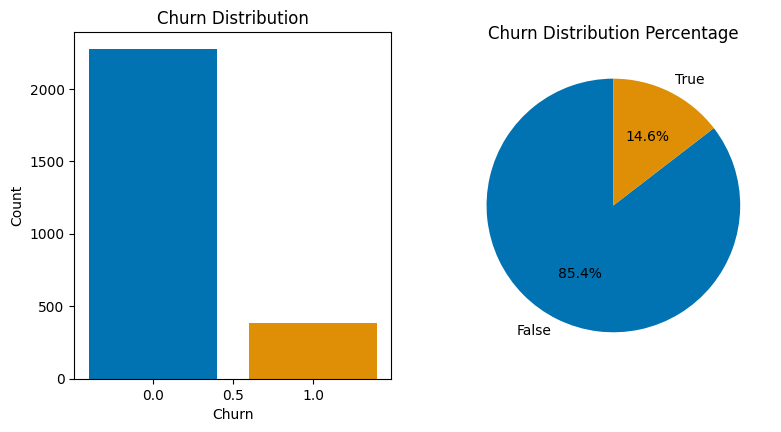

In [18]:
# Plotting the bar and pie charts for the variable Churn.
feature = churn_train['Churn']
figsize=(9, 4.5)

fig, axs = plt.subplots(ncols=2,  # Number of columns of the subplot grid = 2
                            figsize=figsize)  # creating the 2 subplots
feature_count = feature.value_counts()
feature_percentage = feature_count / feature_count.sum() * 100

colors = sns.color_palette('colorblind', len(feature_count))

# Bar Plot
axs[0].bar(feature_count.index, feature_count, color=colors)
axs[0].set_xlabel(feature.name)
axs[0].set_ylabel('Count')
axs[0].set_title(feature.name + ' Distribution')

# Pie Chart
axs[1].pie(feature_percentage, labels=feature_percentage.index, colors=colors, autopct='%1.1f%%', startangle = 90)
axs[1].set_title(feature.name + ' Distribution Percentage')

plt.show()

- Around 15% of Orange Telecom customers churned during the period in which the data was extracted.
- The dataset is imbalanced, as the number of non-churners is almost six times higher than the number of churners.
    - It must be adressed during predictions, as this imbalance may lead to bias.

#### Obervations on State

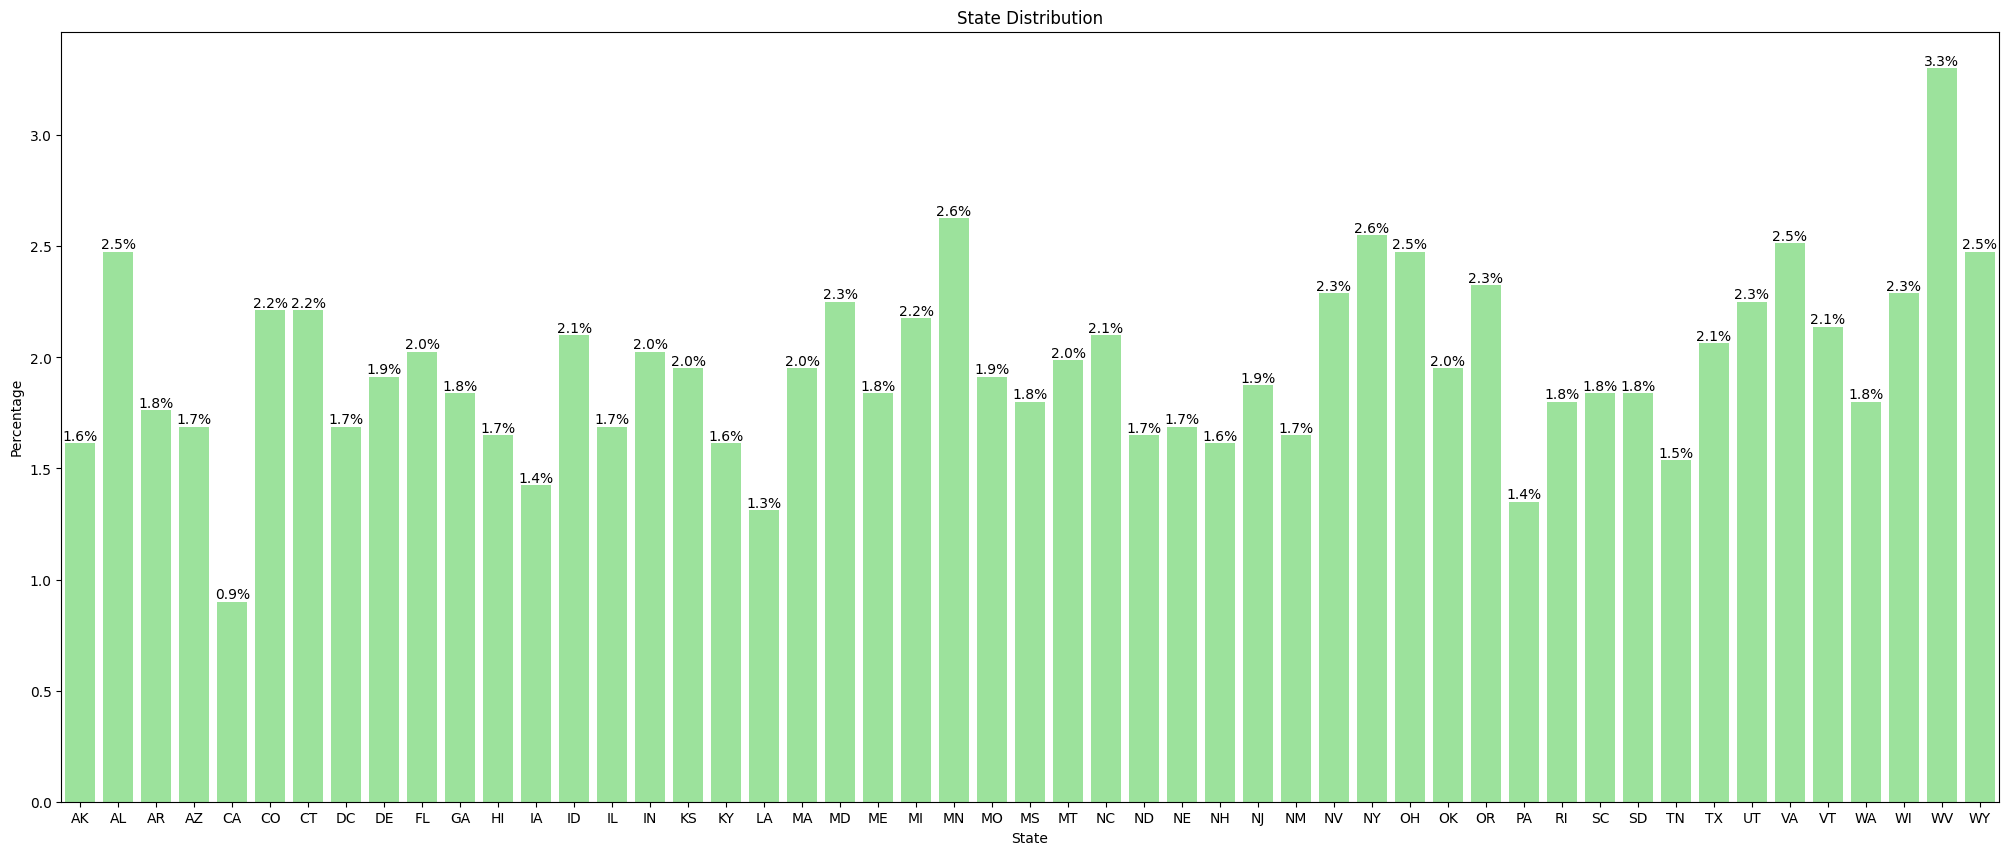

In [19]:
# Plotting the bar chart for the variable State.
feature = churn_train['State']

feature_count = feature.value_counts()
feature_percentage = feature_count / feature_count.sum() * 100

fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=feature_percentage.index, y=feature_percentage.values, color='lightgreen')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.xlabel(feature.name)
plt.ylabel('Percentage')
plt.title(feature.name + ' Distribution')
plt.show()

- WV is the state with most customers of the dataset, while while CA is the one with the least.
- This might add bias to the prediction model, because the states have different populations.
- The amount of customers is very similar between the remaining states (from 1.4% to 2.6% of all the data).

#### Obervations on Area code

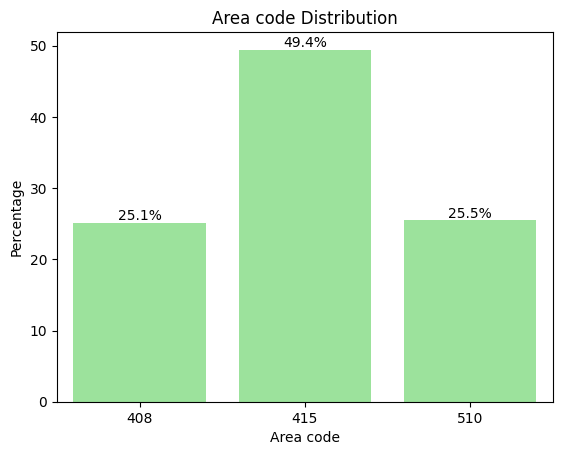

In [20]:
# Plotting the bar chart for the variable Area code.
feature = churn_train['Area code']

feature_count = feature.value_counts()
feature_percentage = feature_count / feature_count.sum() * 100

ax = sns.barplot(x=feature_percentage.index, y=feature_percentage.values, color='lightgreen')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.xlabel(feature.name)
plt.ylabel('Percentage')
plt.title(feature.name + ' Distribution')
plt.show()

- There are only 3 area codes in the dataset, which doesn't make sense as it covers all the USA's states according to the initial interpretation of what 'Area code' means.
- It could have a different meaning than "a set of digits that identifies a particular telephone service area within a state".
- This variable should be discarded due to the lack of information about it.

### Multivariate Analysis

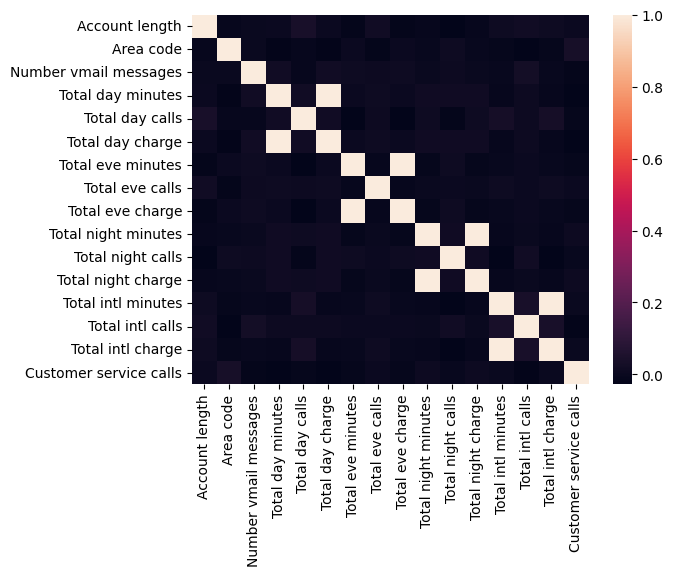

In [21]:
numerical_features = churn_train.select_dtypes(include=np.number)  # selecting numerical features
cormat = numerical_features.corr()
sns.heatmap(cormat)
plt.show()

It is possible to note that there is a high correlation between the variables:
- Total day minutes and Total day charge;
- Total eve minutes and Total eve charge;
- Total night minutes and Total night charge;
- Total intl minutes and Total intl charge.

The charge is calculated using total minutes, therefore the charge variables must be dropped.